In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df = sns.load_dataset('titanic') 
df.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.shape 

(891, 15)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe(exclude=[int, float]).T 

,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
adult_male,891,2,True,537
deck,203,7,C,59
embark_town,889,3,Southampton,644
alive,891,2,no,549
alone,891,2,True,537


### Data Cleaning 

In [6]:
df.isnull().sum() 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.duplicated().sum() 

np.int64(107)

In [8]:
df1 = df.drop(columns=['embarked', 'class', 'deck', 'alive'], axis=1) 
df1.head() 

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


In [10]:
df1['age'].fillna(df1['age'].mean(), inplace=True) 
df1['embark_town'].fillna(df1['embark_town'].mode()[0], inplace=True) 

In [11]:
df1.isnull().sum() 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [12]:
df1.drop_duplicates(inplace=True) 
df1

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.000000,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.000000,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.000000,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.000000,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.000000,0,0,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,woman,False,Queenstown,False
887,1,1,female,19.000000,0,0,30.0000,woman,False,Southampton,True
888,0,3,female,29.699118,1,2,23.4500,woman,False,Southampton,False
889,1,1,male,26.000000,0,0,30.0000,man,True,Cherbourg,True


In [13]:
df1.duplicated().sum() 

np.int64(0)

In [14]:
def category(age):
    if age <=14:
        return 'Young' 
    elif age <=18:
        return 'Teen' 
    elif age <=30: 
        return 'Adult' 
    elif age <=55: 
        return 'Middle' 
    else: 
        return 'Senior' 

In [15]:
df1['Age_Category'] = df['age'].apply(category) 

In [16]:
df1.head() 

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,Age_Category
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False,Adult
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False,Middle
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True,Adult
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False,Middle
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True,Middle


In [17]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      780 non-null    int64  
 1   pclass        780 non-null    int64  
 2   sex           780 non-null    object 
 3   age           780 non-null    float64
 4   sibsp         780 non-null    int64  
 5   parch         780 non-null    int64  
 6   fare          780 non-null    float64
 7   who           780 non-null    object 
 8   adult_male    780 non-null    bool   
 9   embark_town   780 non-null    object 
 10  alone         780 non-null    bool   
 11  Age_Category  780 non-null    object 
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 68.6+ KB


In [18]:
num = df1.select_dtypes(include=[int, float]).columns 
cat = df1.select_dtypes(exclude=[int, float]).columns 

In [21]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 

In [22]:
for col in cat: 
    df1[col] = le.fit_transform(df1[col]) 

In [23]:
df1.head() 

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,Age_Category
0,0,3,1,22.0,1,0,7.2500,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,2,0,0,0,1
2,1,3,0,26.0,0,0,7.9250,2,0,2,1,0
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,1
4,0,3,1,35.0,0,0,8.0500,1,1,2,1,1


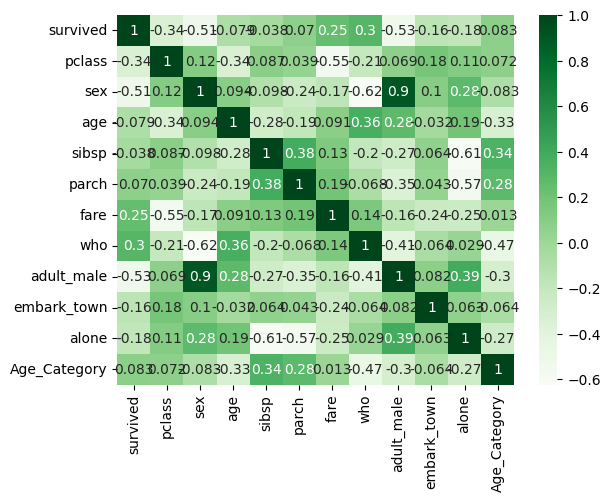

In [24]:
corr = df1.corr() 

plt.Figure(figsize=(10,8)) 
sns.heatmap(corr, annot=True, cmap='Greens') 
plt.show() 

In [25]:
x = df1.drop('survived', axis=1) 
y = df1['survived'] 

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
from xgboost import XGBClassifier 

model = XGBClassifier() 
model.fit(x_train, y_train) 

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [28]:
y_pred = model.predict(x_test) 
y_pred 

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1])

In [29]:
Accuracy = accuracy_score(y_test, y_pred)*100 
print("Accuracy:", Accuracy)

ClassRep = classification_report(y_test, y_pred) 
print("Classification Report:", ClassRep) 

Accuracy: 78.84615384615384
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.84      0.82        91
           1       0.76      0.72      0.74        65

    accuracy                           0.79       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.79      0.79      0.79       156



ROC AUC: 0.8372


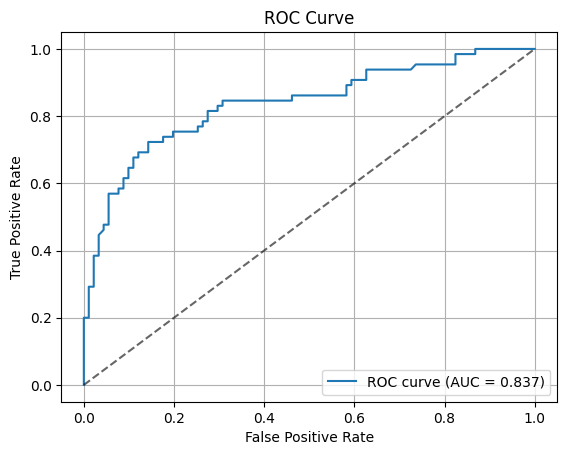

In [34]:

from sklearn.metrics import roc_auc_score, roc_curve, auc


# get predicted probabilities for the positive class
y_proba = model.predict_proba(x_test)[:, 1]

# print AUC-ROC
auc_score = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {auc_score:.4f}")

# plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


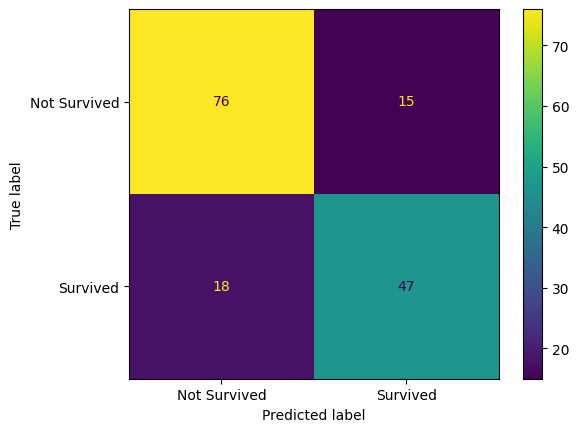

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=['Not Survived', 'Survived']
)
disp.plot(values_format='d')  


In [44]:
x_test.head(0) 

,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,Age_Category


In [45]:
new_data = [[3,0,45,0,0,0,0,0,0,0,0]] 

predic1 = model.predict(new_data) 

if predic1 == 0:
    print(' Not Survived')
else:
    print(' Survived') 

 Survived


In [47]:
import pickle 

with open('TitanicXGB.pkl', 'wb') as f: 
    pickle.dump(model, f) 